In [2]:
import sys
sys.path.append('../')

import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

from classic_descriptors.featurisation import process_dataframe
from analysis import analysis_stratification_influence, analysis_train_set_size, analysis_stratification_influence_substrates, get_raw_results, analysis_stratification_influence_substrates_raw

from sklearn.metrics import mean_absolute_error, accuracy_score, balanced_accuracy_score, explained_variance_score, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.pipeline import Pipeline

import dft_descriptors.prepocessing as pp
import dft_descriptors.featurisation as ft

import warnings
warnings.filterwarnings('ignore')

import matplotlib

font = {'family' : 'normal',
        'size'   : 25}
matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})
matplotlib.rcParams['axes.unicode_minus'] = False
sns.set_style("white")
%matplotlib inline

In [2]:
import dft_descriptors.prepocessing as pp
import dft_descriptors.featurisation as ft

In [3]:
df = pd.read_csv("data_csv/Data_test11262021.csv", sep = ',')
df2 = pp.preprocess(df)
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)

df2 = AL_preprocess(df2)

In [39]:
import copy
X, y, DOIs, mechanisms, origins = ft.process_dataframe_dft(copy.copy(df2), data_path="data_csv/")
display_df =  pd.DataFrame(zip(y, mechanisms, origins, DOIs), columns =['Yields', 'Mechanisms', 'Origin', 'DOIs'])

NoLigand


In [40]:
def replace_meca(df):
    df.replace(to_replace='Murahashi', value='Organolithiums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Negishi', value='Organozincs', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Kumada', value='Organomagnesiums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Suzuki', value='Boron derivatives', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='C-H activation', value='Activated C-Hs', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Isocyanates', value='Isocyanates', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Hiyama', value='Organosilanes', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='CO2 Insertion', value='Carbon dioxide', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Buchwald', value='Amines', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Ni/Cu cooperation', value='Amines', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='Al _coupling', value='Organoaluminums', inplace=True,
                   limit=None, regex=False, method='pad')
    df.replace(to_replace='P_coupling', value='Phosphoryls', inplace=True,
                   limit=None, regex=False, method='pad')
    df.rename(columns={"Mechanisms": "Coupling Reagent"}, inplace=True)

In [41]:
replace_meca(display_df)

In [42]:
display_df["Coupling Reagent"].unique()

array(['Organolithiums', 'Organozincs', 'Organomagnesiums',
       'Boron derivatives', 'Activated C-Hs', 'Isocyanates',
       'Organosilanes', 'Carbon dioxide', 'Amines', 'Organoaluminums',
       'Phosphoryls'], dtype=object)

In [43]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
               init='random').fit_transform(X)
tsne1 = [i[0] for i in X_embedded]
tsne2 = [i[1] for i in X_embedded]
tsne_df = pd.DataFrame(zip(tsne1, tsne2, DOIs, mechanisms, origins, y), columns =['TSNE 1', 'TSNE 2', 'DOIs', 'Mechanisms', 'Origin', 'Yields'])

In [44]:
replace_meca(tsne_df)

[]

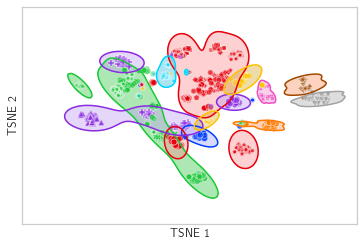

In [45]:
sns.set_style("whitegrid", {'axes.grid' : False})

g2 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, levels=3, thresh=0.001,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 1)

g0 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, levels=3, thresh=0.001,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4)
h, l = g0.get_legend_handles_labels()

g0.get_legend().remove()
g0.legend(h, l, bbox_to_anchor=(2.02, 1.025))

g = sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent",
                style="DOIs", alpha=0.5, 
                palette='bright', sizes = 3)
h, l = g.get_legend_handles_labels()
new_l = l[-13:]
new_h = h[-13:]
g.get_legend().remove()
#g.legend(new_h, new_l, bbox_to_anchor=(1.02, 1.025))
g.set_xticks([])
g.set_yticks([])



In [46]:
new_l = l[-13:]
new_h = h[-13:]

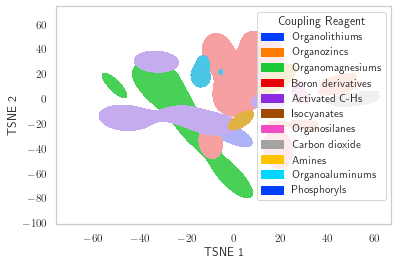

In [47]:
g = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, levels=5, thresh=.001,
                palette ='bright')

[]

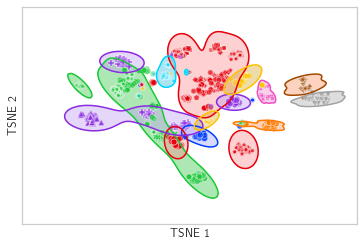

In [48]:
sns.set_style("whitegrid", {'axes.grid' : False})


g2 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, levels=3, thresh=0.001,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 1)

g0 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, levels=3, thresh=0.001,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4)
h, l = g0.get_legend_handles_labels()

g0.get_legend().remove()
g0.legend(h, l, bbox_to_anchor=(2.02, 1.025))

g = sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent",
                style="DOIs", alpha=0.5, 
                palette='bright', sizes = 3)
h, l = g.get_legend_handles_labels()
new_l = l[-13:]
new_h = h[-13:]
g.get_legend().remove()
#g.legend(new_h, new_l, bbox_to_anchor=(1.02, 1.025))
g.set_xticks([])
g.set_yticks([])

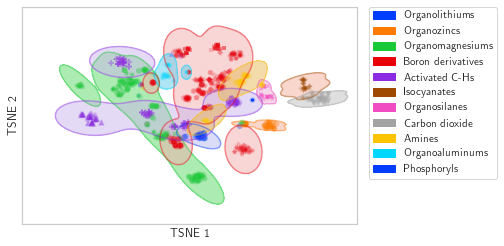

In [49]:
sns.set_style("whitegrid", {'axes.grid' : False})

g2 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, thresh=0.0005,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4, linewidth=50)

g0 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.5)

legend = g0.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
g0.get_legend().remove()

g = sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", legend=False,
                style="DOIs", alpha=0.2, 
                palette='bright', linewidth=0.1)

g.set_xticks([])
g.set_yticks([])
g.legend(handles, labels, bbox_to_anchor=(1.02, 1.025))

plt.show()

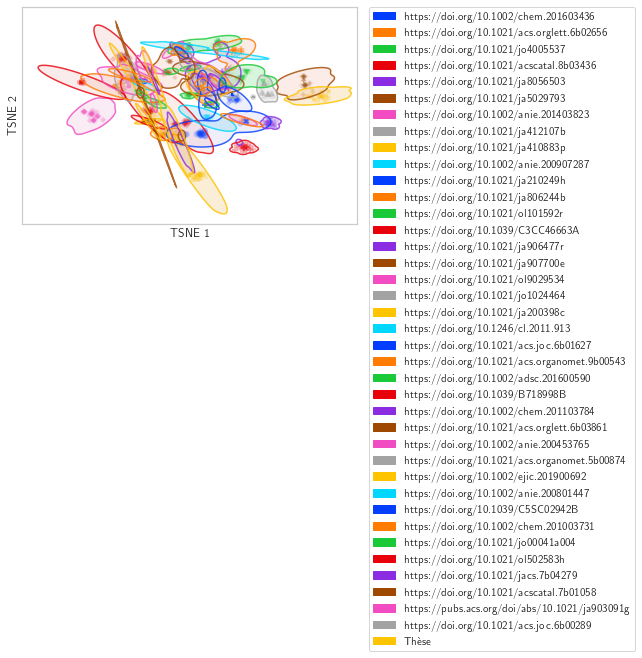

In [50]:
sns.set_style("whitegrid", {'axes.grid' : False})

g2 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=False, thresh=0.0001,
                palette ='bright', gridsize=200,
                cut = 3, alpha  = 0.8, linewidth=50)

g0 = sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=True, thresh=0.0001,
                palette ='bright', gridsize=200, alpha  = 0.25)
legend = g0.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
g0.get_legend().remove()

g = sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", legend=False,
                style="Coupling Reagent", alpha=0.1, 
                palette='bright', sizes = 3, linewidth=0.1)

g.set_xticks([])
g.set_yticks([])
g.legend(handles, labels, bbox_to_anchor=(1.02, 1.025))

plt.show()

# Avec PCA plutot que TSNE ?

In [238]:
from sklearn.decomposition import PCA
X_embedded = PCA(n_components=2).fit_transform(X)

In [240]:
pca1 = [i[0] for i in X_embedded]
pca2 = [i[1] for i in X_embedded]

pca_df = pd.DataFrame(zip(pca1, pca2, DOIs, mechanisms, origins, y), columns =['PC_1', 'PC_2', 'DOIs', 'Mechanisms', 'Origin', 'Yields'])

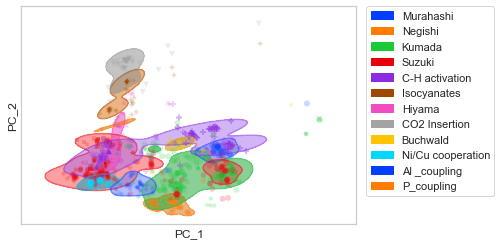

In [267]:
sns.set_style("whitegrid", {'axes.grid' : False})

g2 = sns.kdeplot(data=pca_df, x="PC_1", y="PC_2", 
                levels =1,
               hue="Mechanisms", fill=False, thresh=0.2,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4)

g0 = sns.kdeplot(data=pca_df, x="PC_1", y="PC_2", 
                hue="Mechanisms", fill=True, thresh=0.2,
                levels = 2,
                palette ='bright', gridsize=100, alpha  = 0.5)

legend = g0.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
g0.get_legend().remove()

g = sns.scatterplot(data=pca_df, x="PC_1", y="PC_2", 
                hue="Mechanisms", legend=False,
                style="DOIs", alpha=0.2, 
                palette='bright', linewidth=0.1)

g0.set_xticks([])
g0.set_yticks([])
g0.legend(handles, labels, bbox_to_anchor=(1.43, 1.025))

plt.show()

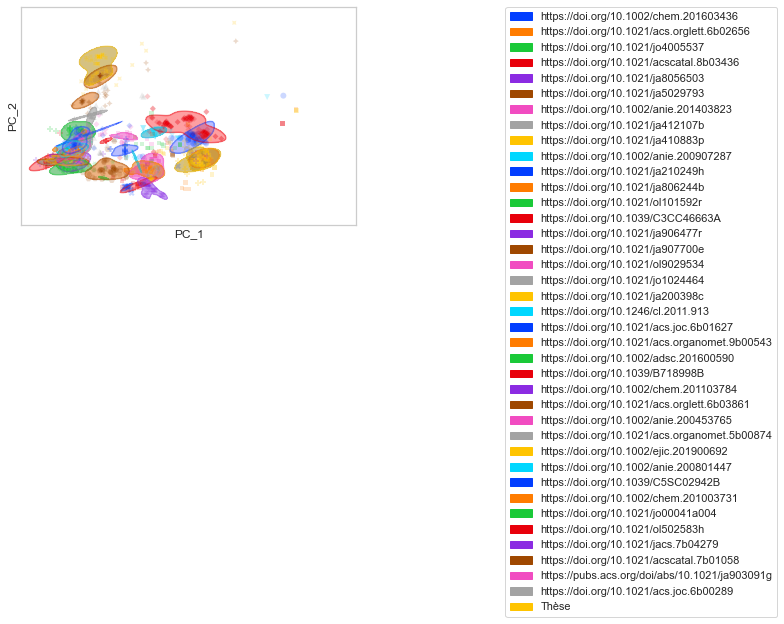

In [286]:
sns.set_style("whitegrid", {'axes.grid' : False})

g2 = sns.kdeplot(data=pca_df, x="PC_1", y="PC_2", 
                levels =1,
               hue="DOIs", fill=False, thresh=0.2,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4)

g0 = sns.kdeplot(data=pca_df, x="PC_1", y="PC_2", 
                hue="DOIs", fill=True, thresh=0.2,
                levels = 2,
                palette ='bright', gridsize=100, alpha  = 0.5)

legend = g0.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
g0.get_legend().remove()

g = sns.scatterplot(data=pca_df, x="PC_1", y="PC_2", 
                hue="DOIs", legend=False,
                style="Mechanisms", alpha=0.2, 
                palette='bright', linewidth=0.1)

g0.set_xticks([])
g0.set_yticks([])
g0.legend(handles, labels, bbox_to_anchor=(1.43, 1.025))

plt.show()

# FINAL FIGURE : TSNE

In [52]:
df = pd.read_csv("data_csv/Data_test11262021.csv", sep = ',')
df2 = pp.preprocess(df)
def AL_preprocess(df):
    df["Lewis Acid"] = df["Lewis Acid"].fillna('NoLewisAcid')
    df["Lewis Acid"] = df["Lewis Acid"].replace('nan', 'NoLewisAcid')
    Lewis_Acids_to_drop = ['O=C(O[Cs])O[Cs]', 'Cl[Cs]', 
                       'O=S(=O)(O[Sc](OS(=O)(=O)C(F)(F)F)OS(=O)(=O)C(F)(F)F)C(F)(F)F', 
                       'F[Cs]', 'O=P(O[Na])(O[Na])O[Na]', '[Rb+]',
                       'CC(C)(C)C(=O)O[Cs]', '[Cs+]', 'CC(=O)O[Cu]OC(C)=O', 'F[Sr]F']
    for al in Lewis_Acids_to_drop:
        df = df[df["Lewis Acid"] != al]
    
    return df.reset_index(drop=True)

df2 = AL_preprocess(df2)

In [54]:
import copy
X, y, DOIs, mechanisms, origins = ft.process_dataframe_dft(copy.copy(df2), data_path="data_csv/")
display_df =  pd.DataFrame(zip(y, mechanisms, origins, DOIs), 
                           columns =['Yields', 'Mechanisms', 'Origin', 'DOIs'])
replace_meca(display_df)
dois = np.unique(DOIs)

NoLigand


In [114]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto',
               #init='random', 
                  random_state=11).fit_transform(X)

# RANDOM STATES TESTED
#1, 10 good
#4, 7, 10 not good
#5, 6,8 ok

tsne1 = [i[0] for i in X_embedded]
tsne2 = [i[1] for i in X_embedded]

In [193]:
num_doi = 5
num_coupl = 11
num_sub = 5
meca = np.unique(mechanisms)
substrates = df2["Reactant Smile (C-O)"].unique()
nums = np.random.choice([0, 1], size=len(X_embedded), p=[.3, .7])
random_split= ["Test Set" if i == 0 else "Train Set" for i in nums]
doi_split = ["Test Set" if i == dois[num_doi] else "Train Set" for i in DOIs]
coupl_split = ["Test Set" if i == meca[num_coupl] else "Train Set" for i in mechanisms]
#'CC(C)(C)C(=O)Oc1ccc2ccccc2c1'
#bof : 'CC(C)(C)C(=O)Oc1cccc2ccccc12', 'COc1cccc2ccccc12'
substrate_split = ["Test Set" if i == 'CC(C)(C)C(=O)Oc1ccc2ccccc2c1' else "Train Set" for i in df2["Reactant Smile (C-O)"]]
tsne_df = pd.DataFrame(zip(tsne1, tsne2, DOIs, mechanisms, origins, y, 
                           random_split, doi_split, coupl_split, substrate_split), 
                       columns =['TSNE 1', 'TSNE 2', 'DOIs', 'Mechanisms', 'Origin', 
                                 'Yields', 
                                 'Random Split', 'DOI Split', 'Coupling Reagent Split',
                                'Subtrate Split'])
replace_meca(tsne_df)

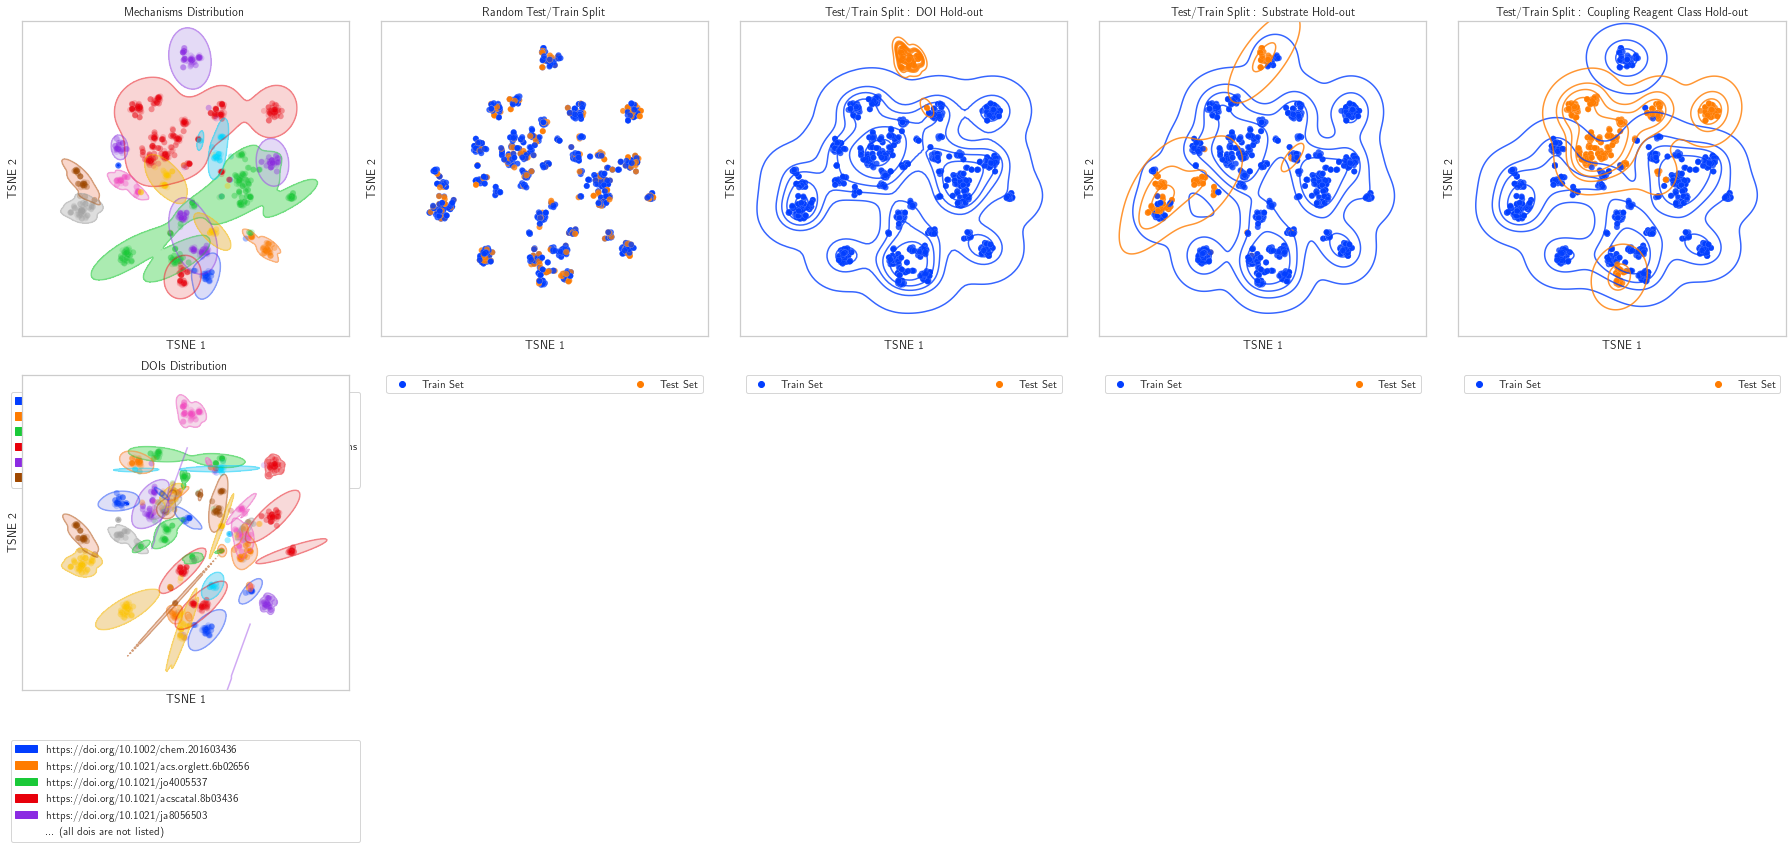

In [195]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))

# first plot TSNE by Mecanisms
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, thresh=0.0003,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4, linewidth=50,
           ax = ax[0, 0])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, thresh=0.0003,
                palette ='bright', gridsize=100, alpha  = 0.5,
           ax = ax[0, 0])

legend = ax[0, 0].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[0, 0].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", legend=False,
                #style="DOIs", 
                alpha=0.2, 
                palette='bright', linewidth=0.1,
               ax= ax[0, 0])

ax[0, 0].set_title("Mechanisms Distribution")
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].set_xbound(lower=-75, upper=75)
ax[0, 0].set_ybound(lower=-70, upper=70)
ax[0, 0].legend(handles, labels, 
             bbox_to_anchor=(-0.05, -0.5, 1.1, 1), 
             ncol=2,
             mode= "expand"
            )


# first plot TSNE by DOIs
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=False, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.4, linewidth=50,
           ax = ax[1, 0])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=True, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.5,
           ax = ax[1, 0])

legend = ax[1, 0].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[1, 0].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", legend=False,
                alpha=0.2, 
                palette='bright', linewidth=0.1,
               ax= ax[1, 0])

ax[1, 0].set_title("DOIs Distribution")
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].set_xbound(lower=-75, upper=75)
ax[1, 0].set_ybound(lower=-70, upper=70)
h = handles[:5]
import matplotlib.patches as patches
h_fin = patches.Rectangle(h[0].get_xy(), h[0].get_width(), h[0].get_height())
h_fin.set_color('white')
h.append(h_fin)
l = labels[:5]
l.append("... (all dois are not listed)")
ax[1, 0].legend(h, l, 
             bbox_to_anchor=(-0.05, -0.5, 1.1, 1),
             mode="expand",
             ncol=1)

# Random split task

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Random Split", legend=True,
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,1])

ax[0,1].set_title("Random Test/Train Split")
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_xbound(lower=-75, upper=75)
ax[0,1].set_ybound(lower=-70, upper=70)

ax[0,1].legend(bbox_to_anchor=(0, -0.2, 1, 1),
             ncol=2, 
             mode="expand"
            )

# DOI split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="DOI Split", 
            fill=False, thresh=0.01,
            palette ='bright', gridsize=100, alpha = 0.8,
            ax = ax[0,2])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOI Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,2])

ax[0,2].set_title("Test/Train Split : DOI Hold-out")
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[0,2].set_xbound(lower=-75, upper=75)
ax[0,2].set_ybound(lower=-70, upper=70)

ax[0,2].legend(bbox_to_anchor=(0, -0.2, 1, 1),
             ncol=2, 
             mode="expand"
            )

# Substrate split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Subtrate Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5,
            ax = ax[0,3])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Subtrate Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,3])

ax[0,3].set_title("Test/Train Split : Substrate Hold-out")
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
ax[0,3].set_xbound(lower=-75, upper=75)
ax[0,3].set_ybound(lower=-70, upper=70)

ax[0,3].legend(bbox_to_anchor=(0, -0.2, 1, 1),
             ncol=2, 
             mode="expand"
            )


# Mechanism split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Coupling Reagent Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5,
            ax = ax[0,4])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,4])

ax[0,4].set_title("Test/Train Split : Coupling Reagent Class Hold-out")
ax[0,4].set_xticks([])
ax[0,4].set_yticks([])
ax[0,4].set_xbound(lower=-75, upper=75)
ax[0,4].set_ybound(lower=-70, upper=70)

ax[0,4].legend(bbox_to_anchor=(0, -0.2, 1, 1),
             ncol=2, 
             mode="expand"
            )



ax[1, 1].axis('off')
ax[1, 2].axis('off')
ax[1, 3].axis('off')
ax[1, 4].axis('off')

fig.tight_layout()

plt.savefig("exploration2.svg", dpi=600, bbox_inches='tight')
plt.show()

In [182]:
from collections import Counter
z = df2["Reactant Smile (C-O)"].to_list()
Counter(z)

Counter({'COc1ccc2ccccc2c1': 320,
         'COc1ccc2cc([Si](C)(C)C)ccc2c1': 5,
         'COc1ccc2cc(N3CCCCC3)ccc2c1': 3,
         'COc1ccc2ccc(O)cc2c1': 1,
         'COc1cccc2ccccc12': 28,
         'COc1ccc(C)cc1': 8,
         'COc1ccc([C@@H](C)N(C)C)cc1': 1,
         'COc1ccc([C@H](C)N(C)C)cc1': 1,
         'COc1ccc(CO)cc1': 2,
         'COc1ccc(CCO)cc1': 1,
         'COc1ccc2ncccc2c1': 1,
         'COc1ccc2c(ccn2C)c1': 1,
         'COc1ccc2c(c1)c1ccccc1n2C': 1,
         'CCOc1ccc2ccccc2c1': 3,
         'CC(C)Oc1ccc2ccccc2c1': 3,
         'C[Si](C)(C)Oc1ccc2ccccc2c1': 10,
         'CC(C)(C)[Si](C)(C)Oc1ccc2ccccc2c1': 2,
         'CC[Si](C)(C)Oc1ccc2ccccc2c1': 1,
         'CC(C)[Si](C)(C)Oc1ccc2ccccc2c1': 1,
         'C[Si](C)(Oc1ccc2ccccc2c1)c1ccccc1': 1,
         'CC[Si](CC)(CC)Oc1ccc2ccccc2c1': 1,
         'C=CC[Si](C)(C)Oc1ccc2ccccc2c1': 1,
         'CC(C)(C)C(=O)Oc1ccc2ccccc2c1': 221,
         'CN(C)C(=O)Oc1ccc2ccccc2c1': 32,
         'COc1ccc2cc(C3CC3)ccc2c1': 1,
         'COCCCC

In [ ]:
good_subs =['CC(C)(C)C(=O)Oc1ccc2ccccc2c1', ]

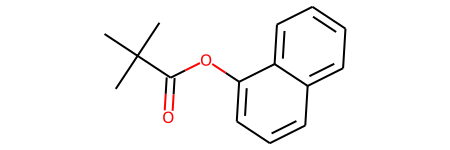

In [188]:
from rdkit import Chem
Chem.MolFromSmiles('CC(C)(C)C(=O)Oc1cccc2ccccc12')

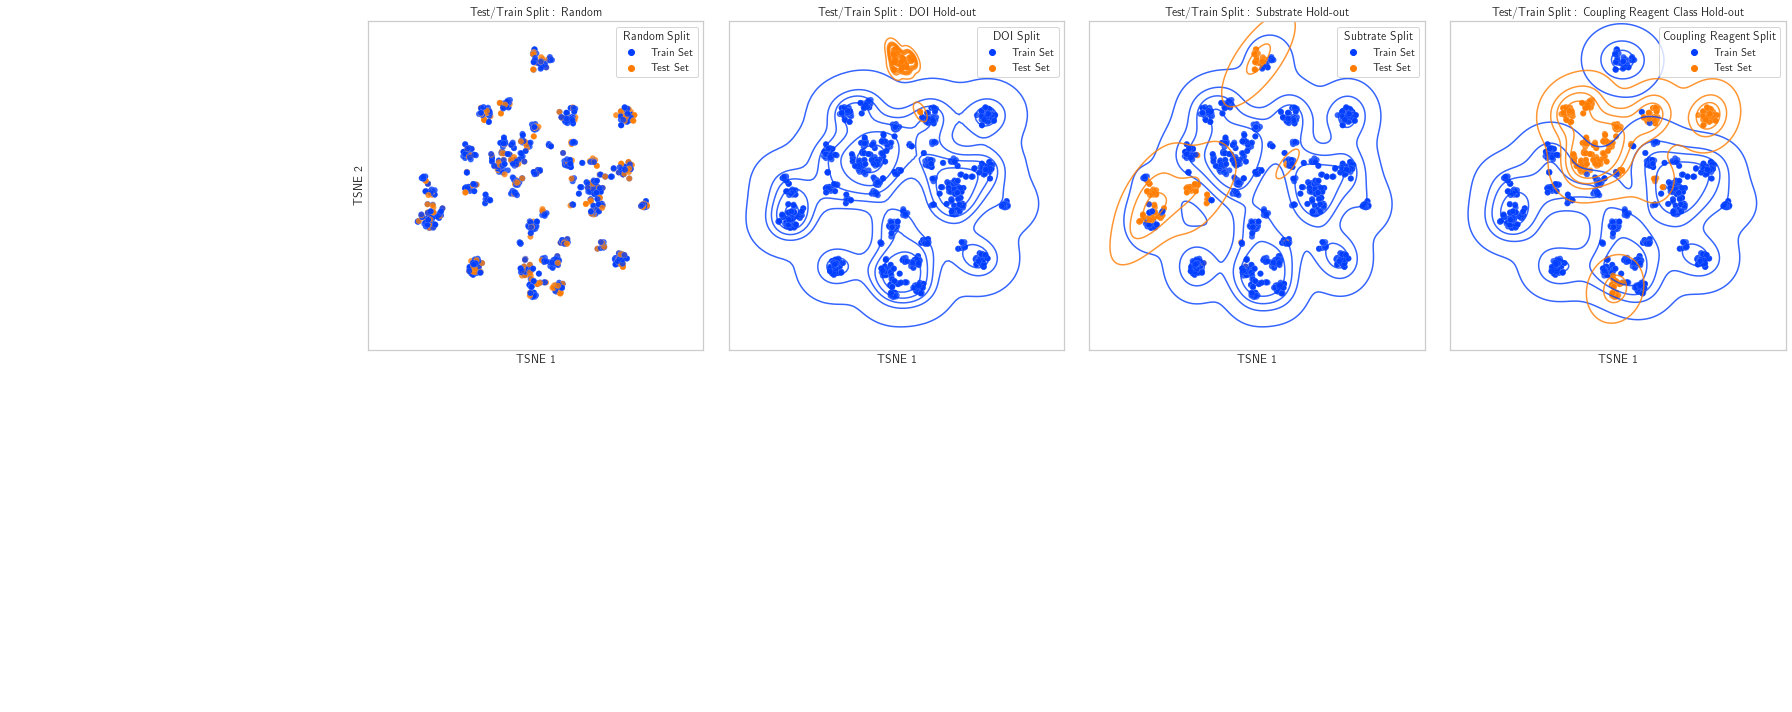

In [225]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))

# Random split task

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Random Split", legend=True,
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,1])

ax[0,1].set_title("Test/Train Split : Random")
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,1].set_xbound(lower=-75, upper=75)
ax[0,1].set_ybound(lower=-70, upper=70)

#ax[0,1].legend(bbox_to_anchor=(0, -0.2, 1, 1),
#             ncol=2, 
#             mode="expand"
#            )

# DOI split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="DOI Split", 
            fill=False, thresh=0.01,
            palette ='bright', gridsize=100, alpha = 0.8,
            ax = ax[0,2])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOI Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,2])

ax[0,2].set_title("Test/Train Split : DOI Hold-out")
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[0,2].set_ylabel("")
ax[0,2].set_xbound(lower=-75, upper=75)
ax[0,2].set_ybound(lower=-70, upper=70)

#ax[0,2].legend(bbox_to_anchor=(0, -0.2, 1, 1),
#             ncol=2, 
#             mode="expand"
#            )

# Substrate split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Subtrate Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5,
            ax = ax[0,3])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Subtrate Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,3])

ax[0,3].set_title("Test/Train Split : Substrate Hold-out")
ax[0,3].set_xticks([])
ax[0,3].set_yticks([])
ax[0,3].set_ylabel("")
ax[0,3].set_xbound(lower=-75, upper=75)
ax[0,3].set_ybound(lower=-70, upper=70)

#ax[0,3].legend(bbox_to_anchor=(0, -0.2, 1, 1),
#             ncol=2, 
#             mode="expand"
#            )


# Mechanism split task

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
            hue="Coupling Reagent Split", 
            fill=False, thresh=0.05,
            palette ='bright', gridsize=300, alpha = 0.8,
            levels=5,
            ax = ax[0,4])

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent Split", legend=True,
                #style="Mechanisms",
                alpha=0.8, 
                palette='bright', linewidth=0.1,
                ax = ax[0,4])

ax[0,4].set_title("Test/Train Split : Coupling Reagent Class Hold-out")
ax[0,4].set_xticks([])
ax[0,4].set_yticks([])
ax[0,4].set_ylabel("")
ax[0,4].set_xbound(lower=-75, upper=75)
ax[0,4].set_ybound(lower=-70, upper=70)

#ax[0,4].legend(bbox_to_anchor=(0, -0.2, 1, 1),
#             ncol=2, 
#             mode="expand"
#            )

ax[1, 1].axis('off')
ax[1, 2].axis('off')
ax[1, 3].axis('off')
ax[1, 4].axis('off')
ax[0, 0].axis('off')
ax[1, 0].axis('off')

fig.tight_layout()

plt.savefig("splits.svg", dpi=600, bbox_inches='tight')
plt.show()

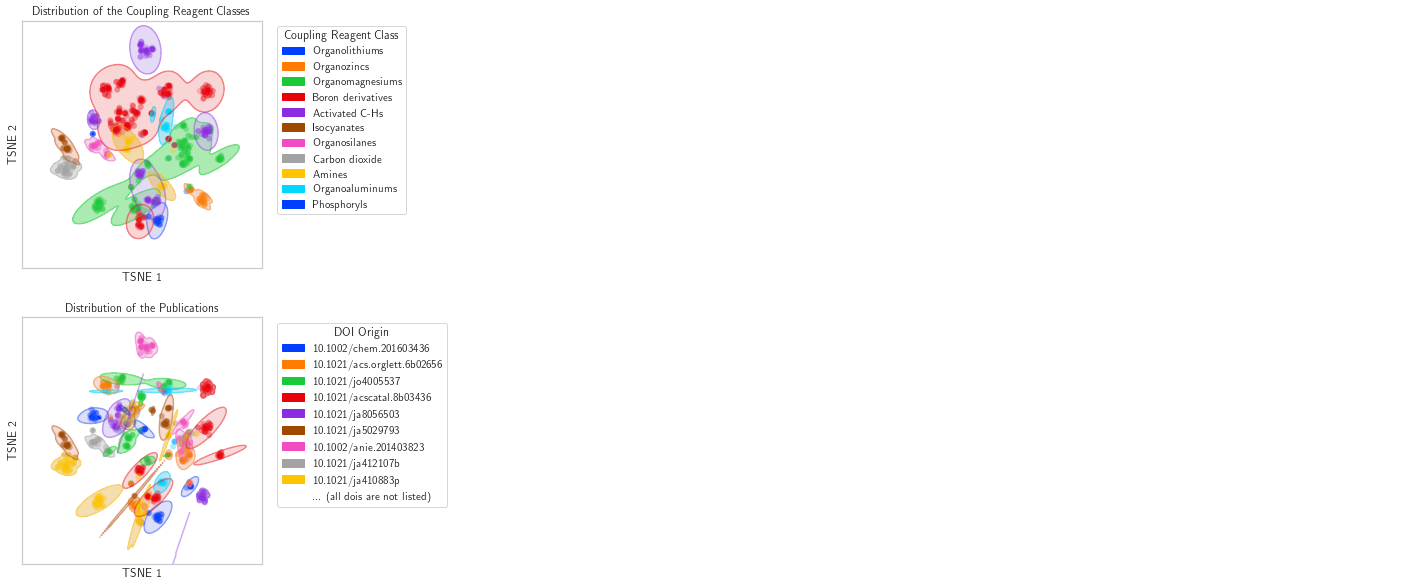

In [220]:
sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots(2, 5, figsize=(25, 10))

# first plot TSNE by Mecanisms
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=False, thresh=0.0003,
                palette ='bright', gridsize=100,
                cut = 3, alpha  = 0.4, linewidth=50,
           ax = ax[0, 0])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", fill=True, thresh=0.0003,
                palette ='bright', gridsize=100, alpha  = 0.5,
           ax = ax[0, 0])

legend = ax[0, 0].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[0, 0].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="Coupling Reagent", legend=False,
                #style="DOIs", 
                alpha=0.2, 
                palette='bright', linewidth=0.1,
               ax= ax[0, 0])

ax[0, 0].set_title("Distribution of the Coupling Reagent Classes")
ax[0, 0].set_xticks([])
ax[0, 0].set_yticks([])
ax[0, 0].set_xbound(lower=-75, upper=75)
ax[0, 0].set_ybound(lower=-70, upper=70)
ax[0, 0].legend(handles, labels, 
             bbox_to_anchor=(1.04, 1.0), 
             ncol=1,
           #  mode= "expand"
             title="Coupling Reagent Class",
            )


# first plot TSNE by DOIs
sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=False, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.4, linewidth=50,
           ax = ax[1, 0])

sns.kdeplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", fill=True, thresh=0.0005,
                palette ='bright', gridsize=100, alpha  = 0.5,
           ax = ax[1, 0])

legend = ax[1, 0].get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax[1, 0].get_legend().remove()

sns.scatterplot(data=tsne_df, x="TSNE 1", y="TSNE 2", 
                hue="DOIs", legend=False,
                alpha=0.2, 
                palette='bright', linewidth=0.1,
               ax= ax[1, 0])

ax[1, 0].set_title("Distribution of the Publications")
ax[1, 0].set_xticks([])
ax[1, 0].set_yticks([])
ax[1, 0].set_xbound(lower=-75, upper=75)
ax[1, 0].set_ybound(lower=-70, upper=70)

n_leg = 9
h = handles[:n_leg]
import matplotlib.patches as patches
h_fin = patches.Rectangle(h[0].get_xy(), h[0].get_width(), h[0].get_height())
h_fin.set_color('white')
h.append(h_fin)
l = []
for s in labels[:n_leg]:
    s = s.replace('https://doi.org/', '')
    l.append(s)
    
l.append("... (all dois are not listed)")
ax[1, 0].legend(h, l, 
             bbox_to_anchor=(1.04, 1.0),
           #  mode="expand",
             title="DOI Origin",
             ncol=1)


ax[1, 1].axis('off')
ax[1, 2].axis('off')
ax[1, 3].axis('off')
ax[1, 4].axis('off')
ax[0, 1].axis('off')
ax[0, 2].axis('off')
ax[0, 3].axis('off')
ax[0, 4].axis('off')


plt.savefig("distributions.svg", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# Restricted to one mechanism :

In [248]:
Suz_df = tsne_df[tsne_df["Coupling Reagent Split"] == "Test Set"]
NonSuz_df = tsne_df[tsne_df["Coupling Reagent Split"] == "Train Set"]

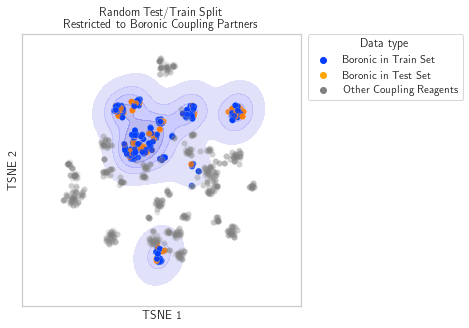

In [330]:
sns.set_style("whitegrid", {'axes.grid' : False})

ax = plt.figure(figsize=(5, 5))

# first plot TSNE by Mecanisms

sns.kdeplot(data=Suz_df, x="TSNE 1", y="TSNE 2",
            fill=True, thresh=0.05,
            color='blue', gridsize=100,
            alpha = 0.4, linewidth=50,
           levels =5)

ax = sns.scatterplot(data=Suz_df, x="TSNE 1", y="TSNE 2", 
                hue="Random Split",
                alpha=0.8, 
                palette='bright', linewidth=0.1)

legend = ax.get_legend()
labels = [] if legend is None else [str(x._text) for x in legend.texts]
handles = [] if legend is None else legend.legendHandles
ax.get_legend().remove()

ax2 = sns.scatterplot(data=NonSuz_df, x="TSNE 1", y="TSNE 2", 
                legend=True, alpha=0.2, 
                color='gray', linewidth=0.1)

h2 = handles[1]
h3 == handles[1]
h3.set_color("gray")
h2.set_color("orange")

h = [handles[0], h2, h3]
l = ["Boronic in Train Set", "Boronic in Test Set", "Other Coupling Reagents"]

ax.set_title("Random Test/Train Split\n Restricted to Boronic Coupling Partners")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xbound(lower=-75, upper=75)
ax.set_ybound(lower=-70, upper=70)
ax.legend(h, l, bbox_to_anchor=(1.6, 1.02), 
             ncol=1, title="Data type")

plt.savefig("fig4.svg", dpi=600, bbox_inches='tight')
plt.show()


In [293]:
h_gray.set_hatch(h_gray,'o')
h_gray.set_color((0.5, 0.5, 0.5, 1))

TypeError: set_color() missing 1 required positional argument: 'c'

In [295]:
h_gray = matplotlib.collections.PathCollection

In [3]:
sns.__version__

'0.11.2'